<a href="https://colab.research.google.com/github/bigdaawg/DL_project_D4_35/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
key='185a4b03f5c1f061f3072589d6d03aeb5f838fe0'

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
df.head()

In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1.shape

In [ ]:
df1

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))


In [ ]:
df1.shape

In [ ]:
df1

In [ ]:
#splitting data set into train and test
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size

train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
train_data

In [ ]:
training_size,test_size

In [ ]:
import numpy

#dense array -> spare matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data,time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(ytest.shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

In [66]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 396ms/step - loss: 0.0439 - val_loss: 8.2633e-04
Epoch 2/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0144 - val_loss: 0.0016
Epoch 3/100
12/12 [==============================] - 3s 226ms/step - loss: 0.0098 - val_loss: 9.9066e-04
Epoch 4/100
12/12 [==============================] - 3s 241ms/step - loss: 0.0084 - val_loss: 5.1308e-04
Epoch 5/100
12/12 [==============================] - 3s 276ms/step - loss: 0.0083 - val_loss: 0.0014
Epoch 6/100
12/12 [==============================] - 3s 232ms/step - loss: 0.0084 - val_loss: 0.0021
Epoch 7/100
12/12 [==============================] - 3s 231ms/step - loss: 0.0068 - val_loss: 2.5812e-04
Epoch 8/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0057 - val_loss: 3.9144e-04
Epoch 9/100
12/12 [==============================] - 4s 326ms/step - loss: 0.0052 - val_loss: 5.7263e-04
Epoch 10/100
12/12 [==============================] - 3s 231ms/ste

In [67]:
import tensorflow as tf

In [68]:
tf.__version__

'2.15.0'

In [69]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 42ms/step


In [70]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [71]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

217.4919289862174

In [72]:
math.sqrt(mean_squared_error(ytest,test_predict))

171.7445136312553

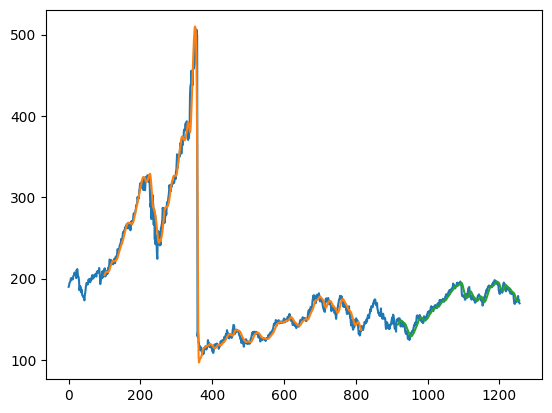

In [73]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [74]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [75]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [76]:
temp_input

[0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257,
 0.18780212899185966,
 0.19048215403882274,
 0.1892798998121477,
 0.19927363807138382,
 0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.21410144020037564,
 0.21898559799624295,
 0.22259236067626798,
 0.21625547902316838,
 0.22008766437069505,
 0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.22001252348152783,
 0.21730745147150904,
 0.21592986850344392,
 0.21618033813400123,
 0.2172573575453976,
 0.21462742642454596,
 0.19737006887914832,
 0.19388854101440195,
 0.18802755165936125,
 0.18619912335629302,
 0.1971696931747025,
 0.19611772072636185,
 0

In [78]:
#prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.17485285 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364
 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235
 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259
 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856
 0.22259236 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511
 0.22304321 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987
 0.21618034 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755
 0.18619912 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138
 0.19233563 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487
 0.21956168 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425
 0.2004258  0.19789606 0.20247965 0.20653726 0.20681277 0.20408265
 0.20541014 0.20115216 0.19586725 0.19363807 0.19291171 0.18902943
 0.18715091 0.18905448 0.1941891  0.18955542 0.18614903 0.18983093
 0.18680025 0.1851221  0.18239198 0.17097057 0.15849718 0.15599249
 0.15569192 0.16002505 0.16508453 0.16628679 0.16102

In [79]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [80]:
import matplotlib.pyplot as plt

In [81]:
len(df1)

1257

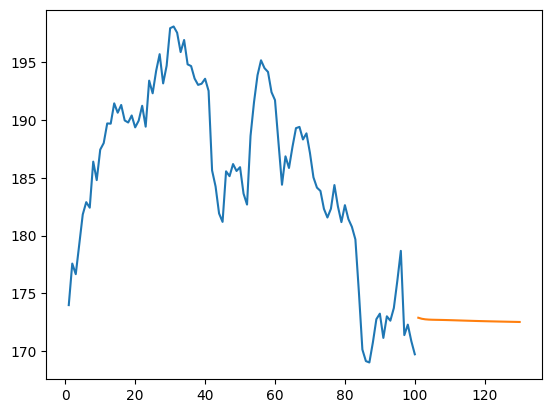

In [85]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

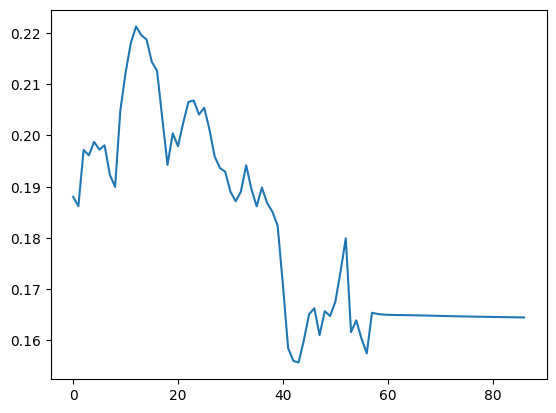

In [86]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [89]:
df3=scaler.inverse_transform(df3).tolist()

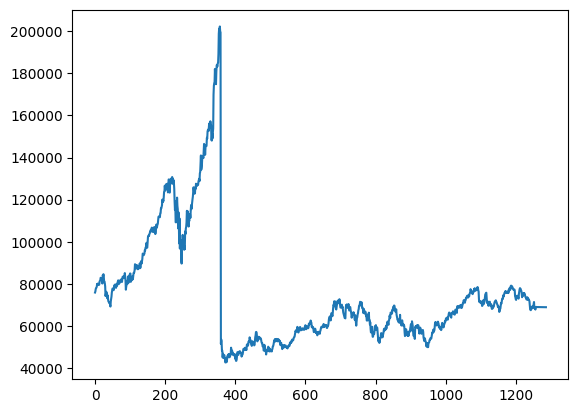

In [90]:
plt.plot(df3)